# Проверка цены USD акций на нормальное распределение

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
usd_d = pd.read_csv("usd.csv")
usd_d['Цена'] = usd_d['Цена'].str.replace(',', '.').astype(float)
usd_d['Дата'] = pd.to_datetime(usd_d['Дата'], format='%d.%m.%Y')  # Преобразование столбца с датами в формат даты
usd_d = usd_d.sort_values(by='Дата')
usd_d.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
764,2020-09-07,75.7585,"75,4087","76,2455","75,4087",NaN,"0,46%"
763,2020-09-08,76.2826,"75,7585","76,5688","75,7328",NaN,"0,69%"
762,2020-09-09,75.3163,"76,2826","76,3873","75,2898",NaN,"-1,27%"
761,2020-09-10,75.2048,"75,3163","75,6695","74,6810",NaN,"-0,15%"
760,2020-09-11,75.0956,"75,2048","75,2048","74,7645",NaN,"-0,15%"


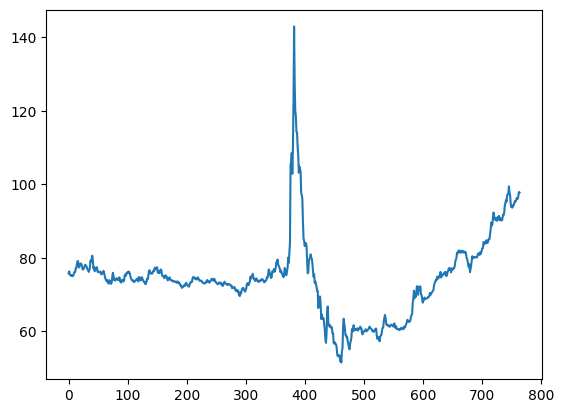

In [ ]:
price = usd_d['Цена'].to_numpy()
plt.plot(price)

<Axes: ylabel='Count'>

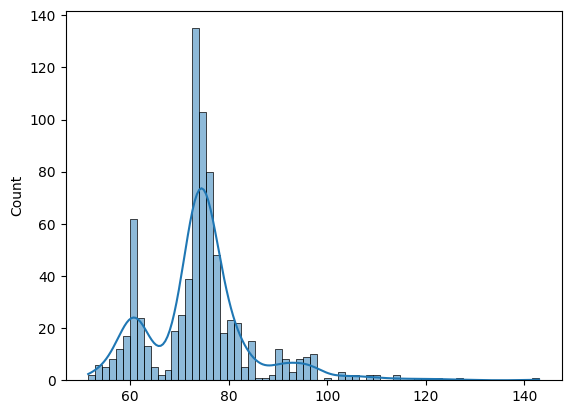

In [ ]:
sns.histplot(price, kde=True)

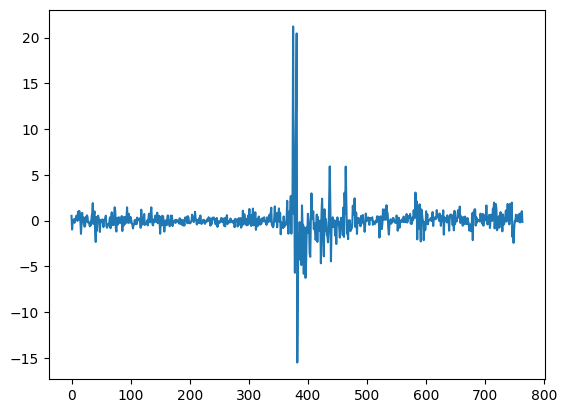

In [ ]:
dif = price[1:]-price[:-1]
plt.plot(dif)

<Axes: ylabel='Count'>

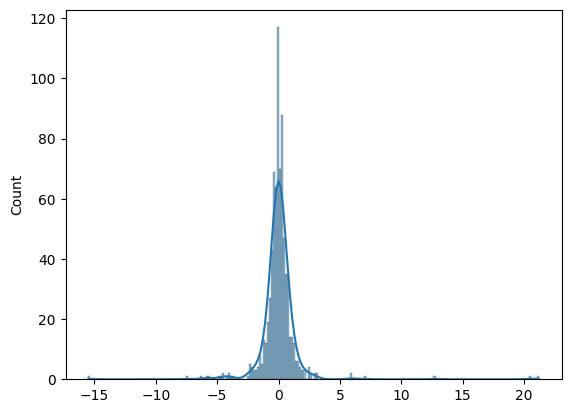

In [ ]:
sns.histplot(dif, kde=True)

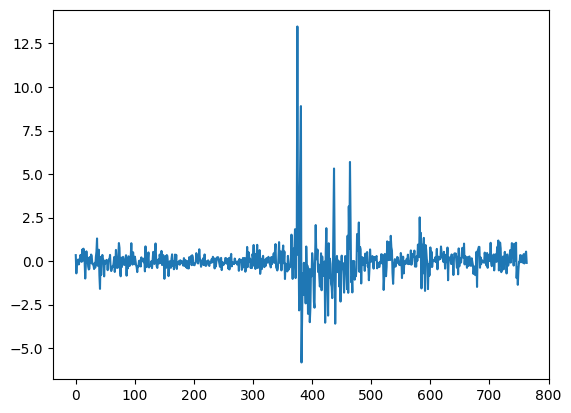

In [ ]:
percent = price[1:]/price[:-1]
percent = (percent-percent.mean())/percent.std()
plt.plot(percent)

<Axes: ylabel='Count'>

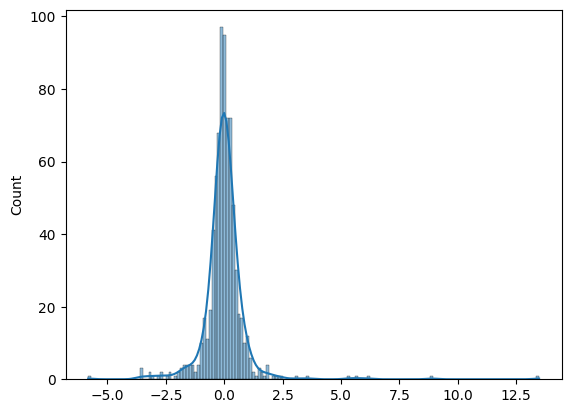

In [ ]:
sns.histplot(percent, kde=True)

In [ ]:
data = percent
# data = np.log(percent)
# data = dif

n_intervals = 100 #количество интервалов
counts, bin_edges = np.histogram(data, bins = n_intervals)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

In [ ]:
mean = np.mean(data)
std = np.std(data, ddof=1)
mean, std

(3.7666205233356096e-15, 1.0006550934210623)

In [ ]:
a,b,c = stats.t.fit(data)
a,b,c

(1.8290083978854113, -0.01234344358719532, 0.33632831126801066)

In [ ]:
std/c

2.9752330086290835

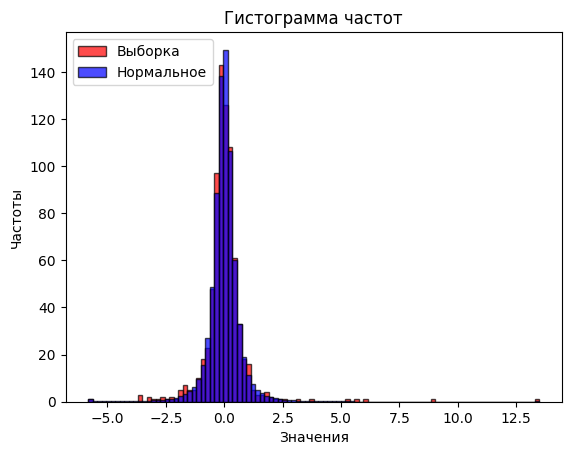

In [ ]:
# norm_h= [stats.t.cdf(bin_edges[i+1],a, loc=b, scale=c) - stats.t.cdf(bin_edges[i],a, loc=b, scale=c) for i in range(1,n_intervals-1)]
# norm_h.insert(0,stats.t.cdf(bin_edges[1],a, loc=b, scale=c))
# norm_h.append(1-stats.t.cdf(bin_edges[-2],a, loc=b, scale=c))
# norm_h=np.array(norm_h)*data.size

norm_h= [stats.t.cdf(bin_edges[i+1],2, loc=mean, scale=std/3) - stats.t.cdf(bin_edges[i],2, loc=mean, scale=std/3) for i in range(1,n_intervals-1)]
norm_h.insert(0,stats.t.cdf(bin_edges[1],2, loc=mean, scale=std/3))
norm_h.append(1-stats.t.cdf(bin_edges[-2],2, loc=mean, scale=std/3))
norm_h=np.array(norm_h)*data.size

# norm_h= [stats.norm.cdf(bin_edges[i+1], loc=mean, scale=std) - stats.norm.cdf(bin_edges[i], loc=mean, scale=std) for i in range(1,n_intervals-1)]
# norm_h.insert(0,stats.norm.cdf(bin_edges[1], loc=mean, scale=std))
# norm_h.append(1-stats.norm.cdf(bin_edges[-2], loc=mean, scale=std))
# norm_h=np.array(norm_h)*data.size

plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]), color='red',edgecolor='black',alpha=0.7, label='Выборка')
plt.bar(bin_centers, norm_h, width=(bin_edges[1] - bin_edges[0]),color='blue',edgecolor='black', alpha=0.7, label='Распределение Стьюдента')
plt.xlabel('Значения')
plt.ylabel('Частоты')
plt.title('Гистограмма частот')
plt.legend(loc='upper left')
plt.show()

In [ ]:
stats.chi2_contingency([norm_h, counts])

Chi2ContingencyResult(statistic=22.66667599836515, pvalue=0.9999999999999999, dof=99, expected_freq=array([[1.16681155e+00, 4.79092676e-02, 5.32531768e-02, 5.94205742e-02,
        6.65760113e-02, 7.49250234e-02, 8.47265150e-02, 9.63096016e-02,
        1.10096787e-01, 1.26636281e-01, 1.46647694e-01, 1.67108766e+00,
        2.01245667e-01, 1.23888649e+00, 7.86466406e-01, 8.47468376e-01,
        1.42693482e+00, 1.03233739e+00, 1.67504023e+00, 1.37284556e+00,
        3.65459022e+00, 5.06879673e+00, 4.70071277e+00, 5.70753744e+00,
        9.89477890e+00, 1.68875236e+01, 2.50075153e+01, 4.84250282e+01,
        9.27999906e+01, 1.40685819e+02, 1.37692006e+02, 1.07103645e+02,
        6.06058755e+01, 3.29716041e+01, 1.84214276e+01, 1.37282513e+01,
        6.18771222e+00, 3.99288871e+00, 3.25526863e+00, 3.27856196e+00,
        1.95818987e+00, 1.23557424e+00, 1.07639373e+00, 9.59723808e-01,
        3.72353480e-01, 3.05680895e-01, 7.53950692e-01, 2.13217848e-01,
        1.80719300e-01, 6.54482051e-

[не подчияется нормальному распределению](https://baguzin.ru/wp/kolebaniya-kursa-rublya-po-otnosheniyu-k-d/)

### Лучше всего подходит распределение Стюдента